# ASSIGNMENT 19: NATURAL LANGUAGE PROCESSING

In [2]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Task 01: Data Cleaning

In [3]:
df = pd.read_csv('amazonreviews.csv')
text_col = "review"   
label_col = "label"   

df_clean = df.drop_duplicates()
df_clean

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


* <b> Text Processing </b>

In [4]:
review_col = None
for col in df_clean.columns:
    if col.lower() in ["review", "text", "review_text", "reviews"]:
        review_col = col
        break

if review_col is None:
    review_col = df_clean.columns[0]

In [5]:
df_clean = df_clean.dropna(subset=[review_col])

In [6]:
stop_words = {
    "the","a","an","is","are","was","were","be","to","and","or","in","on","for",
    "of","this","that","it","with","as","by","at","from","but","not","have","has",
    "had","you","i","we","they","them","their","our","us","your","so","if","then"
}

def preprocess(text):
    text = str(text).lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df_clean[review_col] = df_clean[review_col].apply(preprocess)


In [20]:
print("Cleaning complete! Saved as amazonreviews_cleaned.csv")
print(df_clean.head())


Cleaning complete! Saved as amazonreviews_cleaned.csv
  label                                             review
0   pos  stuning even nongamer sound track beautiful pa...
1   pos  best soundtrack ever anything im reading lot r...
2   pos  amazing soundtrack my favorite music all time ...
3   pos  excellent soundtrack truly like soundtrack enj...
4   pos  remember pull jaw off floor after hearing youv...


# Task 02: Exploratory Analysis

* <b> Word Cloud </b>

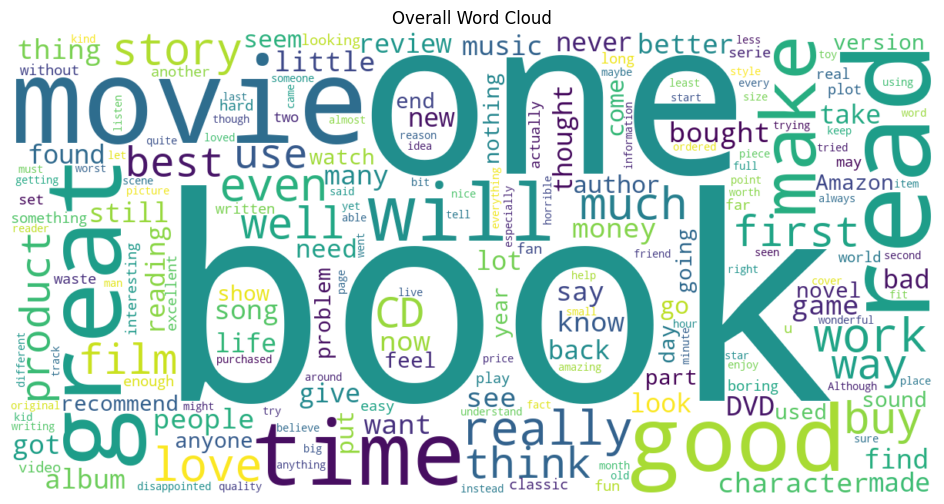

In [8]:
all_text = " ".join(df[text_col].astype(str))
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Overall Word Cloud")
plt.show()


* <b> Sentiment Distribution </b>

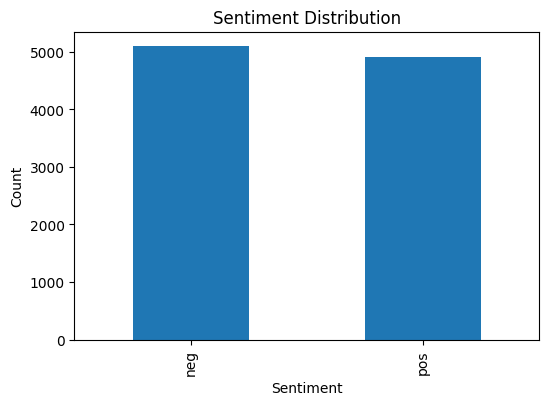

In [9]:
plt.figure(figsize=(6,4))
df[label_col].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


* <b> Most Common Pos/Neg Words </b>

In [10]:
def get_word_freq(dataframe):
    words = " ".join(dataframe[text_col]).split()
    return Counter(words)

# Positive reviews
pos_words = get_word_freq(df[df[label_col] == "pos"])
neg_words = get_word_freq(df[df[label_col] == "neg"])

print("\nTop 20 Positive Words:")
print(pos_words.most_common(20))

print("\nTop 20 Negative Words:")
print(neg_words.most_common(20))



Top 20 Positive Words:
[('the', 16338), ('and', 10758), ('a', 9460), ('to', 8618), ('of', 8356), ('I', 8335), ('is', 7094), ('this', 4881), ('it', 4707), ('in', 4654), ('for', 3842), ('that', 3638), ('was', 2909), ('you', 2759), ('with', 2589), ('book', 2333), ('on', 2315), ('The', 2278), ('but', 2121), ('as', 2090)]

Top 20 Negative Words:
[('the', 18527), ('I', 10477), ('to', 10142), ('and', 9668), ('a', 9538), ('of', 8131), ('is', 6967), ('this', 6159), ('it', 6083), ('in', 4423), ('was', 4224), ('that', 3959), ('for', 3947), ('not', 3476), ('but', 2842), ('The', 2742), ('on', 2724), ('with', 2712), ('you', 2710), ('have', 2661)]


* <b> Word Clouds for Pos/Neg Words </b>

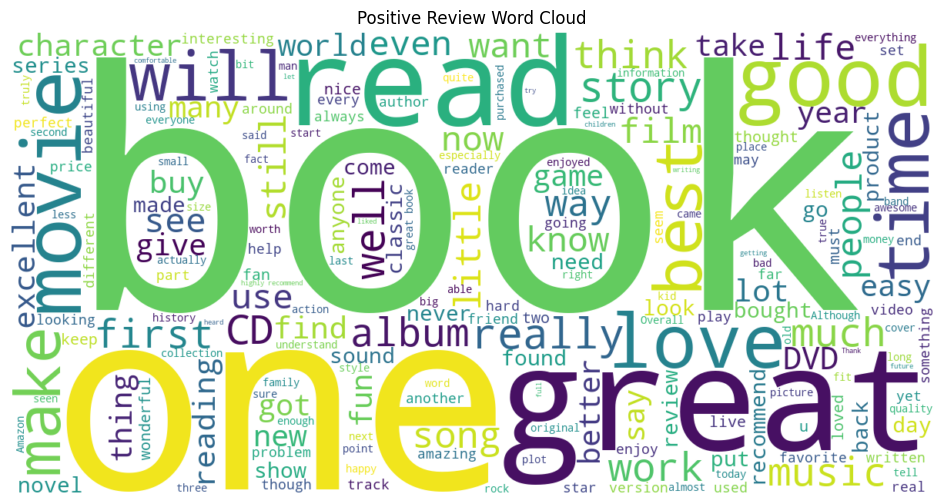

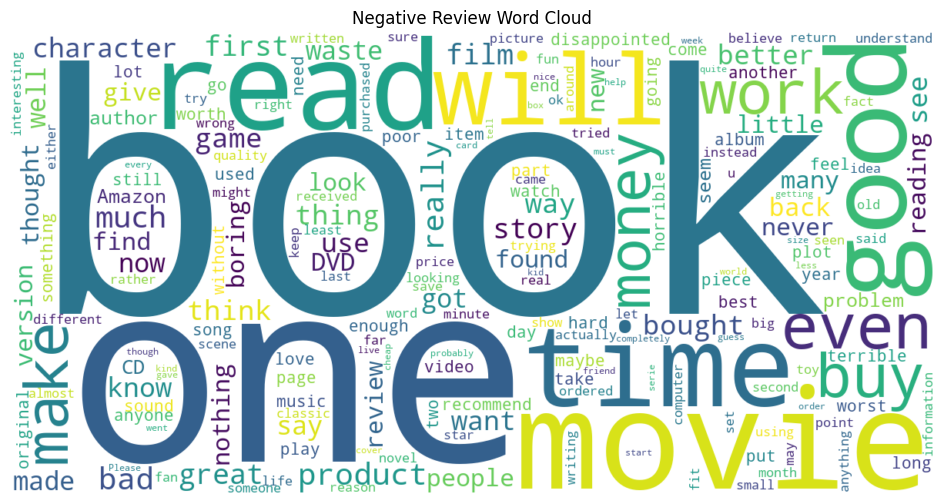

In [11]:
pos_text = " ".join(df[df[label_col] == "pos"][text_col])
neg_text = " ".join(df[df[label_col] == "neg"][text_col])

pos_wc = WordCloud(width=1200, height=600, background_color="white").generate(pos_text)
neg_wc = WordCloud(width=1200, height=600, background_color="white").generate(neg_text)

plt.figure(figsize=(12,6))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Review Word Cloud")
plt.show()

plt.figure(figsize=(12,6))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Review Word Cloud")
plt.show()


# Task 03: Model Development

* <b> TD-IDF + Logistic Regression </b>

In [12]:
X = df["review"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

* <b> Logistic Regression Model </b>

In [14]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_tfidf, y_train)
y_pred_lr = logreg.predict(X_test_tfidf)

print(" Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 Logistic Regression
Accuracy: 0.8665
              precision    recall  f1-score   support

         neg       0.86      0.88      0.87      1037
         pos       0.87      0.85      0.86       963

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



# Task 04: Validation

* <b> Metrics </b>

In [ ]:
print(" Test Set Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='pos'))
print("Recall:", recall_score(y_test, y_pred_lr, pos_label='pos'))
print("F1 Score:", f1_score(y_test, y_pred_lr, pos_label='pos'))

print("Classification Report")
print(classification_report(y_test, y_pred_lr))


 Test Set Metrics
Accuracy: 0.8665
Precision: 0.8694267515923567
Recall: 0.8504672897196262
F1 Score: 0.8598425196850393
Classification Report
              precision    recall  f1-score   support

         neg       0.86      0.88      0.87      1037
         pos       0.87      0.85      0.86       963

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000


Confusion Matrix:
[[914 123]
 [144 819]]
 Cross-Validation Results
CV Scores: [0.8665 0.877  0.859  0.8575 0.8675]
Mean Accuracy: 0.8654999999999999
Std Dev: 0.006978538528947159


* <b> Confusion Matrix </b>

In [22]:
cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[914 123]
 [144 819]]


* <b> Cross Validation (K-Fold) </b>

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    LogisticRegression(max_iter=2000),
    tfidf.transform(X),  
    y,
    cv=kf,
    scoring='accuracy'
)

print(" Cross-Validation Results")
print("CV Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

 Cross-Validation Results
CV Scores: [0.8665 0.877  0.859  0.8575 0.8675]
Mean Accuracy: 0.8654999999999999
Std Dev: 0.006978538528947159
